# **Python Project for Data Science:**

## **Project Overview:**
For this project, you will assume the role of a Data Scientist / Data Analyst working for a new startup investment firm that helps customers invest their money in stocks. Your job is to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks.

After collecting this data you will visualize it in a dashboard to identify patterns or trends. The stocks we will work with are Tesla, Amazon, AMD, and GameStop.

### **Stock Shares:**
A company's stock share is a piece of the company; more precisely:

***A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares."***

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases, the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day. The stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

In this project, we will use the  y-finance API to obtain the stock ticker and extract information about the stock.

# **Extracting Stock Data Using a Python Library:**

You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the *yfinance library*, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.

In [ ]:
# Installing the yfinance library in Python
!pip install yfinance==0.2.4

In [ ]:
import yfinance as yf
import pandas as pd

# Creating an object using the Ticker Class from the yfinance library
# Creating an object allows us to access functions and extract data
apple = yf.Ticker("AAPL")

In [ ]:
# We import the json library to deal with the apple file which is in JSON format
import json

with open("/content/apple.json" , "r") as json_file:
  # Creating a python object i.e. dictionary
  apple_dict = json.load(json_file)

# Viewing the dictionary
print(apple_dict)

# Accessing the key "country"
print(apple_dict["country"])

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 100000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with o

## **Extracting Share Price:**
*A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time.*

Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [ ]:
# We can use the .history() method of the Ticker object to retrieve historical price data, and the result will be a pandas "DataFrame"
apple_share_price= apple.history(period="max")

# Viewing the pandas DataFrame
print(apple_share_price)

                                 Open        High         Low       Close     Volume  Dividends  Stock Splits
Date                                                                                                         
1980-12-12 00:00:00-05:00    0.099319    0.099750    0.099319    0.099319  469033600        0.0           0.0
1980-12-15 00:00:00-05:00    0.094569    0.094569    0.094137    0.094137  175884800        0.0           0.0
1980-12-16 00:00:00-05:00    0.087659    0.087659    0.087228    0.087228  105728000        0.0           0.0
1980-12-17 00:00:00-05:00    0.089387    0.089818    0.089387    0.089387   86441600        0.0           0.0
1980-12-18 00:00:00-05:00    0.091978    0.092410    0.091978    0.091978   73449600        0.0           0.0
...                               ...         ...         ...         ...        ...        ...           ...
2024-01-29 00:00:00-05:00  192.009995  192.199997  189.580002  191.729996   47145600        0.0           0.0
2024-01-30

In [ ]:
# Viewing the first five rows of the DataFrame
print(apple_share_price.head())

                               Open      High       Low     Close     Volume  Dividends  Stock Splits
Date                                                                                                 
1980-12-12 00:00:00-05:00  0.099319  0.099750  0.099319  0.099319  469033600        0.0           0.0
1980-12-15 00:00:00-05:00  0.094569  0.094569  0.094137  0.094137  175884800        0.0           0.0
1980-12-16 00:00:00-05:00  0.087659  0.087659  0.087228  0.087228  105728000        0.0           0.0
1980-12-17 00:00:00-05:00  0.089387  0.089818  0.089387  0.089387   86441600        0.0           0.0
1980-12-18 00:00:00-05:00  0.091978  0.092410  0.091978  0.091978   73449600        0.0           0.0


We can reset the index of the DataFrame with the **.reset_index()** function. We also set the ***inplace*** paramter to True so the change takes place to the DataFrame itself.

We can run the r**eset_index()** method without assigning it to a variable. When we call apple_share_price.reset_index(), it will return a new DataFrame with the index reset, and the original apple_share_price DataFrame will remain unchanged unless we explicitly assign the result to a variable or use the inplace=True parameter.

In [ ]:
# Using the .reset_index() method to include the date as a column as well. This numbers the row from 0 and onwards
apple_share_price.reset_index(inplace=True)

Axes(0.125,0.2;0.775x0.68)


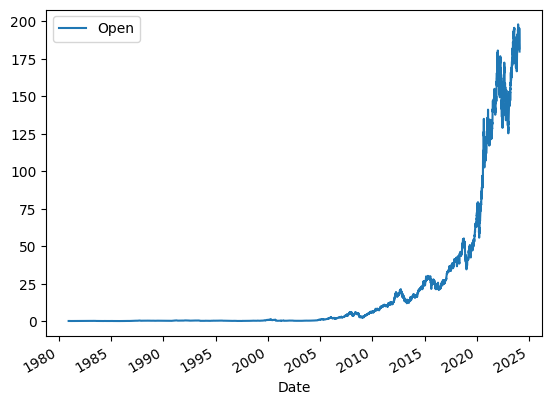

In [ ]:
# Plotting the Open price against the Date
graph= apple_share_price.plot(x="Date", y="Open")       # ∴ apple_share_price = df (DataFrame)

print(graph)

## **Extracting Dividends:**
Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [ ]:
# Viewing the dividends attribute from the apple object
print(apple.dividends)

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
Name: Dividends, Length: 81, dtype: float64


Axes(0.125,0.2;0.775x0.68)


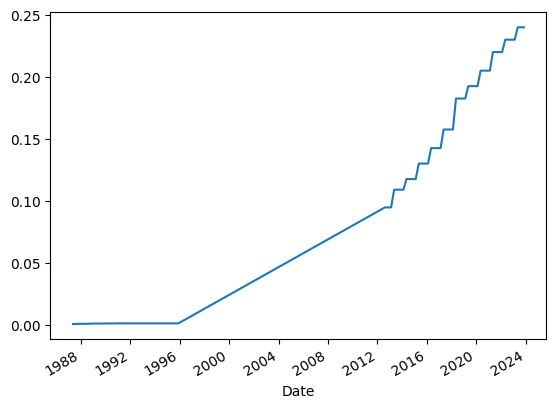

In [ ]:
# Plotting the dividends over time
print(apple.dividends.plot())

## **Extracting Stock Data Exercise : AMD (Advanced Micro Devices)**

In [ ]:
import yfinance as yf
import pandas as pd

# Creating the amd object for AMD (Advanced Micro Devices) with the ticker symbol "AMD"
amd = yf.Ticker("AMD")

# We import the json library to deal with the apple file which is in JSON format
import json

with open("/content/amd.json" , "r") as file:
  # Creating a python object i.e. dictionary
  amd_dict = json.load(file)

# Accessing the key "country" to check for the data's origin
print(amd_dict["country"])

# Finding out the sector to which the stock belongs to
print(amd_dict["sector"])


United States
Technology


In [ ]:
# We can use the .history() method of the Ticker object to retrieve historical price data, and the result will be a pandas "DataFrame"
amd_share_price= amd.history(period="max")

# Using the .reset_index() method to include the date as a column as well. This numbers the row from 0 and onwards
amd_share_price.reset_index(inplace=True)

# Viewing the pandas DataFrame
print(amd_share_price.head())


                       Date  Open      High       Low     Close  Volume  Dividends  Stock Splits
0 1980-03-17 00:00:00-05:00   0.0  3.302083  3.125000  3.145833  219600        0.0           0.0
1 1980-03-18 00:00:00-05:00   0.0  3.125000  2.937500  3.031250  727200        0.0           0.0
2 1980-03-19 00:00:00-05:00   0.0  3.083333  3.020833  3.041667  295200        0.0           0.0
3 1980-03-20 00:00:00-05:00   0.0  3.062500  3.010417  3.010417  159600        0.0           0.0
4 1980-03-21 00:00:00-05:00   0.0  3.020833  2.906250  2.916667  130800        0.0           0.0


In [ ]:
# Finding the volume traded on the first day in the first row
print(amd_share_price.loc[0, "Volume"])


219600


# **Extracting Stock Data Using Web Scraping:**

In this example, we are using yahoo finance website and looking to extract Netflix data.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import requests

In Python, we can ignore warnings using the warnings module. We can use the ***filterwarnings function*** to filter or ignore specific warning messages or categories.

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## **Steps for Extracting the Data:**



1.   Send an HTTP request to the web page using the requests library.
2.   Parse the HTML content of the web page using BeautifulSoup.
3.   Identify the HTML tags that contain the data you want to extract.
4.   Use BeautifulSoup methods to extract the data from the HTML tags.
5.   Print the extracted data.



The **requests.get()** method takes a URL as its first argument, which specifies the location of the resource to be retrieved. In this case, the value of the url variable is passed as the argument to the requests.get() method, because you will store a web page URL in a url variable.

You use the **.text** attribute for extracting the HTML content as a string in order to make it readable.

In [ ]:
# Sending an HTTP request to the web page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url)
print(data)   # 200 means that the request was successful

# Extracting the html content as a string
data_text= data.text

<Response [200]>


## **What is Parsing?**

In simple words, parsing refers to the process of analyzing a string of text or a data structure, usually following a set of rules or grammar, to understand its structure and meaning. Parsing involves breaking down a piece of text or data into its individual components or elements, and then analyzing those components to extract the desired information or to understand their relationships and meanings.

In [ ]:
soup = BeautifulSoup(data_text, 'html.parser')
print(soup)

<!DOCTYPE html>
<html class="NoJs chrome desktop" id="atomic" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued." lang="en-US" name="description"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"/><me

### **Identify the HTML tags:**

As stated above, the web page consists of a table so, ***we will scrape the content of the HTML web page and convert the table into a data frame.***

We will create an empty data frame using the **pd.DataFrame()** function with the following columns:



*   "Date"
*   "Open"
*   "High"
*   "Low"
*   "Close"
*   "Volume"

In [ ]:
# Creating an empty DataFrame in pandas with the specified columns names in the parameter as well
netflix_df = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])
print(netflix_df)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


**The basic structure of HTML tables remains the same across all websites**. The HTML table tags and their purposes are standardized, and web browsers interpret them consistently. Whether you're creating a table for a personal blog, an e-commerce site, or any other type of website, the fundamental HTML tags for tables will remain unchanged.

The HTML table tags provide a standardized way to structure tabular data on the web, but the visual presentation can be customized using CSS(Cascading Style Sheets) to match the specific design requirements of each website.





### **Working on HTML table:**

These are the following tags which are used while creating HTML tables:

**< table >**: This tag is a root tag used to define the start and end of the table. All the content of the table is enclosed within these tags.

**< tr >**: This tag is used to define a table row. Each row of the table is defined within this tag.

**< td >**: This tag is used to define a table cell. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing tags.

**< th >**: This tag is used to define a header cell in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a tag is bold and centered.

**< tbody >**: This is the main content of the table, which is defined using the tag. It contains one or more rows of elements.


**< thead >** is an HTML element that groups the header content in a table. It stands for "table head." The **< th >** (table header) elements are used within < thead > to define header cells in a table. Header cells typically contain labels for the columns or rows of the table.

### **Using a BeautifulSoup method for extracting data:**

We will use **find()** and **find_all()** methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML.



*   The **find()** method will return particular tag content
*   The **find_all()** method returns a list of all matching tags in the HTML

In [ ]:
print(soup.find_all("tbody"))       # The .find_all() method gives us an iterable which is similar to a list in python

[<tbody data-reactid="50"><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Jun 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="54"><span data-reactid="55">504.01</span></td><td class="Py(10px) Pstart(10px)" data-reactid="56"><span data-reactid="57">536.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="58"><span data-reactid="59">482.14</span></td><td class="Py(10px) Pstart(10px)" data-reactid="60"><span data-reactid="61">528.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="62"><span data-reactid="63">528.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="64"><span data-reactid="65">78,560,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="66"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="67"><span data-reactid="68">May 01, 2021</span></td><td class="Py(10px) Pstart(10px

In [ ]:
print(soup.find_all('tr'))

[<tr class="C($tertiaryColor) Fz(xs) Ta(end)" data-reactid="35"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">High</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="48"><span data-reactid="49">Volume</span></th></tr>, <tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Jun 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="54"><span data-reactid="55">504.01</span></td><td class="Py(10px)

In [ ]:
# Example where two consecutive methods are being used similar to below
# Suppose you have a string
text = "Hello, World!"

# You want to convert the string to lowercase and then split it into words
result = text.lower().split()

print(result)

['hello,', 'world!']


In [ ]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    print(col)

In [ ]:
# First we isolate the body of the table(i.e. <tbody>) which contains all the information
# Then we loop through each row and find all the column values for each row

for row in soup.find("tbody").find_all('tr'):             # The loop iterates over each table row in the found tbody.
    col = row.find_all("td")                              # Finds all the table data (<td>) elements within that row and stores them in the col variable.
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    #Finally we append the data of each row to the table
    netflix_df = netflix_df.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

 The data is appended to the Pandas DataFrame using a dictionary. ***The reason for this is that each row of a Pandas DataFrame is essentially a dictionary where the keys are column names, and the values are the corresponding data for each column.*** This is a common and convenient way to add data to a DataFrame.

Pandas DataFrames can be thought of as tables with labeled columns, and dictionaries provide a natural way to structure data with keys corresponding to column names. When you use the append method to add a new row to a DataFrame, you pass a dictionary where keys are column names, and values are the data for each column in that row.

In [ ]:
# We can now print out first 5 rows of the DataFrame using the .head() method
print(netflix_df.head())

           Date    Open    High     Low   Close       Volume Adj Close
0  Jun 01, 2021  504.01  536.13  482.14  528.21   78,560,600    528.21
1  May 01, 2021  512.65  518.95  478.54  502.81   66,927,600    502.81
2  Apr 01, 2021  529.93  563.56  499.00  513.47  111,573,300    513.47
3  Mar 01, 2021  545.57  556.99  492.85  521.66   90,183,900    521.66
4  Feb 01, 2021  536.79  566.65  518.28  538.85   61,902,300    538.85


## **Exercise: Using Webscraping to Extract Stock Data**

In [ ]:
import pandas as pd
import requests

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
html_data = requests.get(url).text

# Creating the soup object using BeautifulSoup class
soup = BeautifulSoup(html_data, 'html.parser')

# Creating the empty DataFrame
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])


for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

# Printing the first 5 rows
print(amazon_data.head() ,"\n")

# Printing out the column names
print(amazon_data.columns ,"\n")

# Printing out the Open of the last row of the DataFrame
print(amazon_data.iloc[-1]["Open"])

# **Extracting and Visualizing Stock Data:**
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data.

**Defining the Graphing Function:**

In this section, we define the function make_graph. We don't have to know how the function works, we should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [65]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## **Using yfinance Library to Extract Stock Data:**

We are looking at the **Tesla Stock** in this case.

In [66]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [77]:
# Creating an object using the Ticker Class from the yfinance library
# Creating an object allows us to access functions and extract data

tesla = yf.Ticker("TSLA")
print(type(tesla))
print(tesla.info)

# We can use the .history() method of the Ticker object to retrieve historical price data, and the result will be a pandas "DataFrame"
tesla_data= tesla.history(period="max")

# Using the .reset_index() method to include the date as a column as well. This numbers the row from 0 and onwards
tesla_data.reset_index(inplace=True)

# Viewing the pandas DataFrame
tesla_data.head()

<class 'yfinance.ticker.Ticker'>
{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through d

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## **Use Webscraping to Extract Tesla Revenue Data:**

*Using BeautifulSoup or the read_html function **extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue**. The dataframe should have columns Date and Revenue.*

In [68]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url)

print(data) # 200 means that the request was successful

# Extracting the html content as a string
html_data= data.text

# Creating the soup object
soup = BeautifulSoup(html_data, 'html.parser')

# Creating an empty DataFrame in pandas with the specified columns names in the parameter as well
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])


# First we isolate the body of the table(i.e. <tbody>) which contains all the information
# Then we loop through each row and find all the column values for each row

for row in soup.find_all("tbody")[1].find_all('tr'):             # The loop iterates over each table row in the found tbody.
    col = row.find_all("td")                                     # Finds all the table data (<td>) elements within that row and stores them in the col variable.
    date = col[0].text
    revenue = col[1].text

    #Finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue.head()

<Response [200]>


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In pandas, the **.str** accessor is used to apply string methods to each element of a Series, which is a column in a DataFrame.

***It is used when you want to perform string operations on the elements of a specific column, treating them as strings.***

The .str accessor is designed for Series, not for DataFrames directly. When you want to apply string operations to a specific column in a DataFrame, you access that column as a Series and then use the .str accessor on that Series.

When we access a specific column from a DataFrame using **tesla_revenue["Revenue"]** and then perform operations on that Series, the changes will be reflected back in the original DataFrame. This is because, in pandas, when we extract a single column from a DataFrame, we get a reference to that column, not a copy.

In [ ]:
# Removing the comma and dollar sign from the "Revenue" column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"").str.replace(',', "")

print(tesla_revenue["Revenue"])

In Pandas, the **.dropna()** method is used to remove missing or NaN (Not a Number) values from a DataFrame. Missing values can occur when working with real-world data, and it's often necessary to clean or preprocess the data before performing analysis or modeling.

***The .dropna() method removes any row that contains at least one missing value***

The **.dropna()** method, by default, returns a new DataFrame with the missing values removed, leaving the original DataFrame unchanged.

If we want to modify the original DataFrame in place, you can use the inplace=True parameter like this: ***df.dropna(inplace=True)***

In [71]:
# Removing the null values in the "Revenue" column
tesla_revenue.dropna(inplace=True)

# Removing empty strings in the "Revenue" column
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [72]:
# Displaying the last 5 rows of the DataFrame
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


### **Boolean Indexing and Boolean Mask:**
*Boolean indexing and boolean mask are concepts in Pandas that involve using boolean conditions to filter data in a DataFrame.*

**Boolean Mask:**


*   A boolean mask is a Series of True and False values that results from applying a boolean condition to a single column or the entire DataFrame
*   It's essentially a way to mark which elements satisfy a particular condition
*   For example, in the expression **df['Name'] != ""**, the result is a boolean mask indicating ***True where the condition is met*** (Name is not an empty string) and ***False where it is not***

**Boolean Indexing:**

*   Boolean indexing is the process of using a boolean mask to select or filter data from a DataFrame
*   Once you have a boolean mask, you can apply it to the DataFrame using square brackets
*   For example, **df[df['Name'] != ""]** uses boolean indexing to select only the rows where the condition in the "Name" column is True

**Important:**

Once you have the boolean mask, you can use it to index the DataFrame.
*The boolean mask is applied using square brackets [ ] to select only the rows where the corresponding value in the mask is True.*

*The boolean mask is applied row by row. Each element in the boolean mask corresponds to a row in the DataFrame. If the boolean value for a particular row is True, that row is included in the result; if it's False, that row is excluded.*

In [53]:
import pandas as pd

# Creating a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', ''],
        'Age': [25, 30, 22, 28]}

df = pd.DataFrame(data)

# Creating a boolean mask
mask = df['Name'] != ''
print(mask, "\n")                # The Boolean Mask is typically a one-dimensional Series of boolean values

# Applying boolean indexing
df_filtered = df[mask]

# Resulting DataFrame
print(df_filtered)

0     True
1     True
2     True
3    False
Name: Name, dtype: bool 

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22


## **Using yfinance Library to Extract Stock Data II:**

In [73]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [74]:
# Creating an object using the Ticker Class from the yfinance library
# Creating an object allows us to access functions and extract data
game_stop = yf.Ticker("GME")

# We can use the .history() method of the Ticker object to retrieve historical price data, and the result will be a pandas "DataFrame"
gme_data= game_stop.history(period="max")

# Using the .reset_index() method to include the date as a column as well. This numbers the row from 0 and onwards
gme_data.reset_index(inplace=True)

# Viewing the pandas DataFrame
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## **Using Webscraping to Extract GME Revenue Data:**

In [81]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data  = requests.get(url)

print(data) # 200 means that the request was successful

# Extracting the html content as a string
html_data= data.text

# Creating the soup object
soup = BeautifulSoup(html_data, 'html.parser')

# Creating an empty DataFrame in pandas with the specified columns names in the parameter as well
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])


# First we isolate the body of the table(i.e. <tbody>) which contains all the information
# Then we loop through each row and find all the column values for each row

for row in soup.find_all("tbody")[1].find_all('tr'):             # The loop iterates over each table row in the found tbody.
    col = row.find_all("td")                                     # Finds all the table data (<td>) elements within that row and stores them in the col variable.
    date = col[0].text
    revenue = col[1].text

    #Finally we append the data of each row to the table
    gme_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

gme_revenue.head()


<Response [200]>


,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [ ]:
# Removing the comma and dollar sign from the "Revenue" column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"").str.replace(',', "")

print(gme_revenue["Revenue"])

In [83]:
# Removing the null values in the "Revenue" column
tesla_revenue.dropna(inplace=True)

# Removing empty strings in the "Revenue" column
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Displaying the last 5 rows of the DataFrame
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## **Plotting Tesla Stock Graph:**
Using the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the make_graph function is:

***make_graph(tesla_data, tesla_revenue, 'Tesla')***

Note that the graph will only show data upto June 2021.

In [79]:
print(make_graph(tesla_data, tesla_revenue, 'Tesla'))

None


## **Plotting GameStop Stock Graph:**

Using the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function:
***make_graph(gme_data, gme_revenue, 'GameStop')***

Note that the graph will only show data upto June 2021.


In [84]:
 make_graph(gme_data, gme_revenue, 'GameStop')